## *santoshhulbutti@gmail.com | DataTrained | Evaluation Project # 04

## Global Power Plant Database Project

<h1 align = "center"><font color = "red">Importing necessary libraries</font></h1>

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

import statsmodels.api as sm
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV

#For Classification model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score, accuracy_score, roc_curve, auc

#For Regression model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#to save model
import pickle

import warnings
warnings.filterwarnings('ignore')

<h1 align = "center"><font color = "red">Getting the Data</font></h1>

In [2]:
data_url = "https://raw.githubusercontent.com/santoshhulbutti/-DataTrained_Evaluation_Projects/main/Global%20Power%20Plant%20Database%20Project/database_IND.csv"
input_data = pd.read_csv(data_url)
pd.set_option('display.max_columns', None)

<h1 align="center"><font color = "red">Data Visualization & EDA</font> </h1>

<h2><font color = "blue">01. Checking the data using .head(), .shape, features' dtypes using .info()</font></h2>

In [3]:
input_data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
input_data.shape

(907, 27)

In [5]:
unique_null_data = pd.DataFrame(list(zip(input_data.nunique(), input_data.isnull().sum(), input_data.dtypes)),
                                columns = ['unique_entries', 'missing values', 'Dtypes'],
                               index=input_data.columns)
unique_null_data

,unique_entries,missing values,Dtypes
country,1,0,object
country_long,1,0,object
name,907,0,object
gppd_idnr,907,0,object
capacity_mw,361,0,float64
latitude,836,46,float64
longitude,827,46,float64
primary_fuel,8,0,object
other_fuel1,3,709,object
other_fuel2,1,906,object


### Observation:
1. The data set has 907rows of data & 27 Columns.
2. Some of feature are of object dtypes and other are of float dtypes.
3. we will drop following columns, based on the missing & unique values:
    - 'country'
    - 'country_long'
    - 'name'
    - 'gppd_idnr'
    - 'other_fuel2'
    - 'other_fuel3'
    - 'owner'
    - 'source',
    - 'url'
    - 'wepp_id'
    - 'year_of_capacity_data'
    - 'generation_gwh_2013'
    - 'geolocation_source',
    - 'generation_gwh_2019'
    - 'estimated_generation_gwh'
    - 'generation_data_source'
4. followeing columns will be filled for missing values
    - latitude and longitude
    - other_fuel1
    - commissioning_year
    - generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018
    
1. Latitude & longitude feature has missing values. we will fill these based on the capacity & primary fuel used.
2. Other_fuel1 has 709 values as NaN/null. non conventional power plant uses only 1 type of fuel. e.g. wind power has only wind force as fuel,Solar power plant will have only sunlight as its fuel. hence we will impute Other_fuels1 based on fuel type.
3. we will impute missing values of commisioning_year based on capacity of power plant.
4. for all other we will impute the mean based on type of primary fule & capacity of the power plant.

In [6]:
data0 = input_data.drop(['country','country_long','name','gppd_idnr','other_fuel2','other_fuel3','owner','source',
                         'url','wepp_id','year_of_capacity_data','generation_gwh_2013','geolocation_source',
                         'generation_gwh_2019','estimated_generation_gwh','generation_data_source'], axis = 1)

In [7]:
data0.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [8]:
data0['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [9]:
data0['other_fuel1'].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

<h2><font color = "blue">02. Checking for descriptive statistics...</font></h2>

In [10]:
#Descriptive statistics
data0.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,NaN,NaN,NaN,326.223755,590.085456,0.0,16.725,59.2,385.25,4760.0
latitude,861.0,NaN,NaN,NaN,21.197918,6.239612,8.1689,16.7739,21.78,25.5124,34.649
longitude,861.0,NaN,NaN,NaN,77.464907,4.939316,68.6447,74.2562,76.7195,79.4408,95.408
primary_fuel,907,8,Coal,258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
other_fuel1,198,3,Oil,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,527.0,NaN,NaN,NaN,1997.091082,17.082868,1927.0,1988.0,2001.0,2012.0,2018.0
generation_gwh_2014,398.0,NaN,NaN,NaN,2431.82359,4026.440035,0.0,223.557672,801.123775,3035.30625,28127.0
generation_gwh_2015,422.0,NaN,NaN,NaN,2428.226946,4194.596959,0.0,176.381063,711.181225,3084.12125,30539.0
generation_gwh_2016,434.0,NaN,NaN,NaN,2467.936859,4162.884308,0.0,188.285252,737.20545,3282.861313,30015.0
generation_gwh_2017,440.0,NaN,NaN,NaN,2547.759305,4196.991169,0.0,177.87493,817.97725,3275.690475,35116.0


### Observation:
1. We see missing observation from count.
2. there are some entries/observations where the minimum value of features is 0.

### imputation of missing values of latitude & longitude features

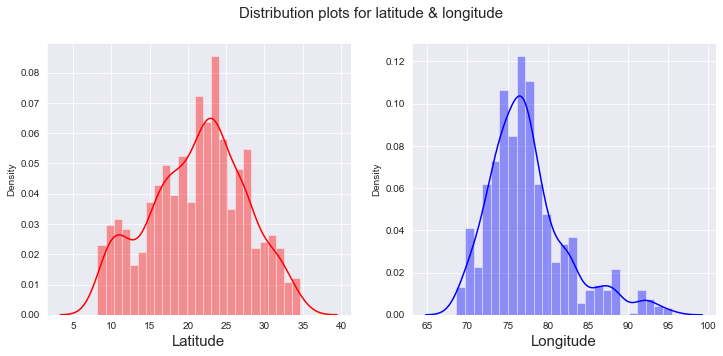

In [14]:
#Distribution plots to understand latitude & longitude
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=False)
sns.distplot(data0['latitude'], ax=axes[0],bins=25,color = 'r')
sns.distplot(data0['longitude'], ax=axes[1],bins=25,color = 'b')
axes[0].set_xlabel('Latitude', fontsize=15)
axes[1].set_xlabel('Longitude', fontsize=15)
fig.suptitle('Distribution plots for latitude & longitude',fontsize=15)
plt.show()

#### Observation:
1. latitude seems to have a normal distribution.
2. Longitude has some level of right skewness.

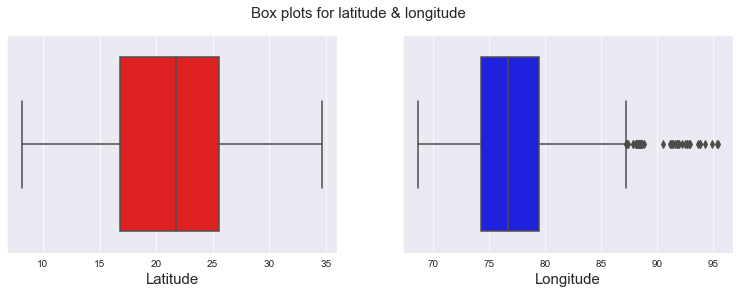

In [15]:
#box plots to understand outliers in latitude & longitude
fig, axes = plt.subplots(1, 2, figsize=(13, 4))
sns.boxplot(x = 'latitude', data = data0, ax=axes[0],color = 'r')
sns.boxplot(x = 'longitude', data = data0, ax=axes[1],color = 'b')
axes[0].set_xlabel('Latitude', fontsize=15)
axes[1].set_xlabel('Longitude', fontsize=15)
fig.suptitle('Box plots for latitude & longitude',fontsize=15)
plt.show()

#### Observation:
1. No outliers in Latitude.
2. Longitude has outliers.

In [17]:
# Index of NaN values of latitude & Longitude column
index_NaN_lat = list(data0["latitude"][data0["latitude"].isnull()].index)
index_NaN_long = list(data0["longitude"][data0["longitude"].isnull()].index)


# to fill missing values of latitude column
for i in index_NaN_lat:
    fuel_type = data0['primary_fuel'].iloc[i]
    cap_val = data0['capacity_mw'].iloc[i]
    data0['latitude'].iloc[i] = data0[(data0['capacity_mw'] >= 0.9*cap_val) & (data0['capacity_mw'] <= 1.1*cap_val)]['latitude'].mean()


# to fill missing values of longitude column
for i in index_NaN_long:
    fuel_type = data0['primary_fuel'].iloc[i]
    cap_val = data0['capacity_mw'].iloc[i]
    data0['longitude'].iloc[i] = data0[(data0['capacity_mw'] >= 0.9*cap_val) & (data0['capacity_mw'] <= 1.1*cap_val)]['longitude'].mean()

In [18]:
data0.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1            709
commissioning_year     380
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

#### Observation:
1. latitude & Longitude missing values are filled.


### imputation of missing values of Other_fuel1, commisioning_year, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017 & generation_gwh_2018

In [20]:
fuel_dict = {np.nan:0,'Oil' : 1, 'Cogeneration':2, 'Gas':3}
data0['other_fuel1'] = data0['other_fuel1'].map(fuel_dict)

In [21]:
data0['other_fuel1'].unique()

array([0, 1, 2, 3], dtype=int64)

In [23]:
data0.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1              0
commissioning_year     380
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [24]:
index_NaN_com_yr = list(data0["commissioning_year"][data0["commissioning_year"].isnull()].index)

In [25]:
null_yr_cols = ['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']

In [26]:
fuel_types = ['Solar','Coal','Wind','Gas','Hydro','Biomass','Oil','Nuclear']
year_list = []
for i in fuel_types:
    year = data0[data0['primary_fuel'] == i]['commissioning_year'].mean()
    year_list.append(round(year,0))
    
year_list

[2013.0, 2006.0, nan, 2003.0, 1989.0, nan, 1995.0, 1994.0]

In [28]:
for i in index_NaN_com_yr:
    fuel_type = data0['primary_fuel'].iloc[i]
    for fuel in range(len(fuel_types)):
        if fuel_type == fuel_types[fuel]:
            data0['commissioning_year'].iloc[i] = year_list[fuel]
            
data0['commissioning_year'] = data0['commissioning_year'].fillna(2007)

In [31]:
nulls = list(data0[(data0['commissioning_year']>=2015)].index)
for i in nulls:
     data0['generation_gwh_2014'].iloc[i]=0
        
nulls = list(data0[(data0['commissioning_year']>=2016)].index)
for i in nulls:
     data0['generation_gwh_2015'].iloc[i]=0
        
nulls = list(data0[(data0['commissioning_year']>=2017)].index)
for i in nulls:
     data0['generation_gwh_2016'].iloc[i]=0
        
nulls = list(data0[(data0['commissioning_year']>=2018)].index)
for i in nulls:
     data0['generation_gwh_2017'].iloc[i]=0 
        
nulls = list(data0[(data0['commissioning_year']>=2019)].index)
for i in nulls:
     data0['generation_gwh_2018'].iloc[i]=0

In [32]:
for i in range(2014,2019):
    nulls = np.where(data0['generation_gwh_{}'.format(i)].isna()==True)
    for j in nulls:
        if [data0['primary_fuel'].iloc[j]] == 'Solar':
            data0['generation_gwh_{}'.format(i)].iloc[j] =((data0['capacity_mw'].iloc[j]*24*365*0.55)/1000)
            
        elif [data0['primary_fuel'].iloc[j]]=='Wind':
            data0['generation_gwh_{}'.format(i)].iloc[j]=((data0['capacity_mw'].iloc[j]*24*365*0.3)/1000)
            
        elif [data0['primary_fuel'].iloc[j]]=='Biomass':
            data0['generation_gwh_{}'.format(i)].iloc[j]=((data0['capacity_mw'].iloc[j]*24*365*0.4)/1000) 
            
        else:
            data0['generation_gwh_{}'.format(i)].iloc[j]=((data0['capacity_mw'].iloc[j]*24*365*0.65)/1000)

In [34]:
## Creating two different dataframes for classification & Regression
data1 = data0.copy()
data_c_01 = data0.copy()

In [35]:
data1

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,0,2011.0,14.235000,14.2350,14.235000,14.235000,14.235000
1,98.0,24.7663,74.6090,Coal,0,2006.0,558.012000,558.0120,558.012000,558.012000,558.012000
2,39.2,21.9038,69.3732,Wind,0,2007.0,223.204800,223.2048,223.204800,223.204800,223.204800
3,135.0,23.8712,91.3602,Gas,0,2004.0,617.789264,843.7470,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,1,2015.0,0.000000,5916.3700,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,1,2016.0,0.000000,0.0000,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,0,2013.0,17.082000,17.0820,17.082000,17.082000,17.082000
904,25.5,15.2758,75.5811,Wind,0,2007.0,145.197000,145.1970,145.197000,145.197000,145.197000
905,80.0,24.3500,73.7477,Coal,0,2006.0,455.520000,455.5200,455.520000,455.520000,455.520000


In [39]:
data1.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

#### Observation:
All the missing values in the dataset are filled.

In [171]:
data1

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,0,2011.0,14.235000,14.2350,14.235000,14.235000,14.235000
1,98.0,24.7663,74.6090,Coal,0,2006.0,558.012000,558.0120,558.012000,558.012000,558.012000
2,39.2,21.9038,69.3732,Wind,0,2007.0,223.204800,223.2048,223.204800,223.204800,223.204800
3,135.0,23.8712,91.3602,Gas,0,2004.0,617.789264,843.7470,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,1,2015.0,0.000000,5916.3700,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,1,2016.0,0.000000,0.0000,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,0,2013.0,17.082000,17.0820,17.082000,17.082000,17.082000
904,25.5,15.2758,75.5811,Wind,0,2007.0,145.197000,145.1970,145.197000,145.197000,145.197000
905,80.0,24.3500,73.7477,Coal,0,2006.0,455.520000,455.5200,455.520000,455.520000,455.520000


In [172]:
data1.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [173]:
num_cols = ['capacity_mw', 'latitude', 'longitude','commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015',
            'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

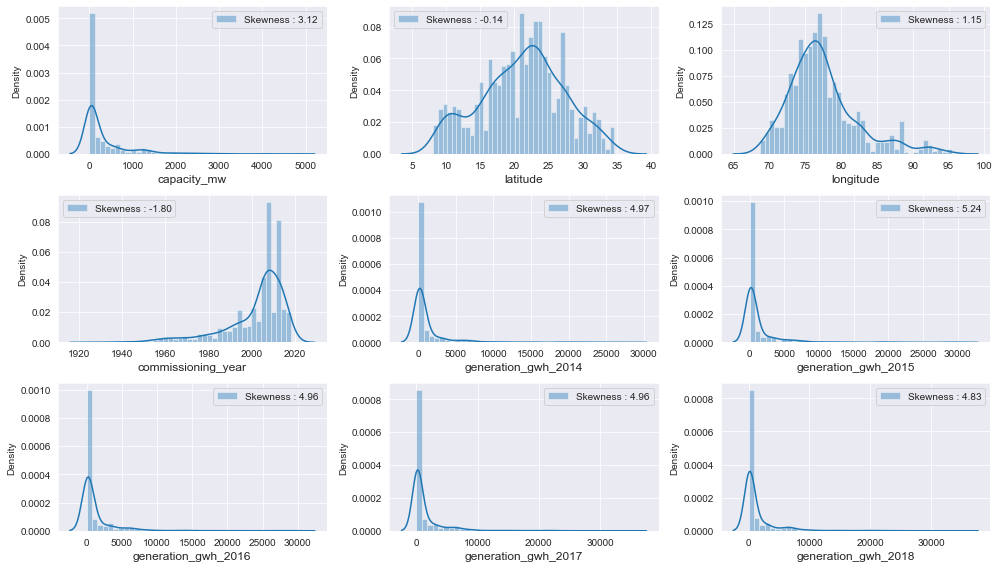

In [175]:
#distribution of numerical features.. 
i=0
plt.figure(figsize=(14,8))
for column in data1[num_cols].columns:
    plt.subplot(3,3,i+1)
    sns.distplot(data1[column], bins=40, label="Skewness : %.2f"%(data1[column].skew())).legend(loc="best")
    plt.xlabel(column,fontsize=12)
    i+=1
    
plt.tight_layout()

#### Observation:
    - Right skewed features
        - Longitude is very little left skewed, but looks normallu distributed.
        - capacity_mw
        - generation_gwh_2014
        - generation_gwh_2015
        - generation_gwh_2016
        - generation_gwh_2017
        - generation_gwh_2018
    - Left skewed features
        - Commisioning year
    - latitude is the only feature with normal distribution.

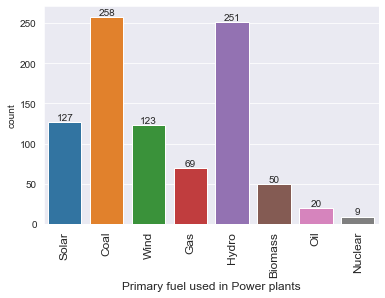

In [178]:
ax = sns.countplot(x= data1['primary_fuel'])
ax.bar_label(ax.containers[0]);
plt.xticks(fontsize = 12, rotation=90)
plt.xlabel('Primary fuel used in Power plants',fontsize=12)
plt.show()

#### Observation:
1. Coal & Water are the most used primary fuel in a power plant, this also signifies the type of power plant established mostly.
2. Nuclear is the least used fuel.

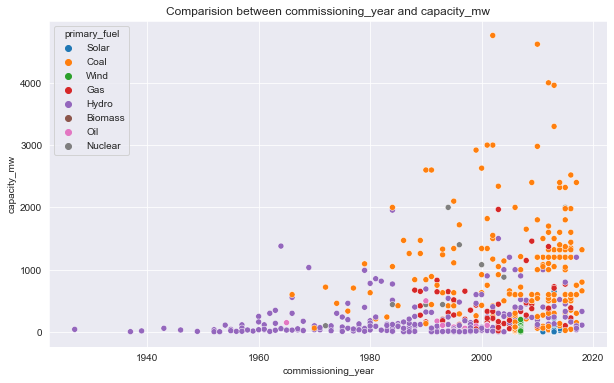

In [180]:
plt.figure(figsize=[10,6])
plt.title('Comparision between commissioning_year and capacity_mw')
sns.scatterplot(x=data1['commissioning_year'],y=data1["capacity_mw"], hue=data1['primary_fuel']);

#### Observation:
1. Hydro power plants are the oldest type of power generation plants.
2. use of coal as fuel to gererate electricity was started after 1960.

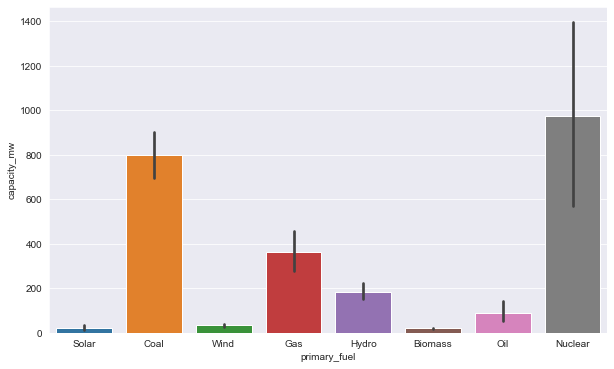

In [181]:
plt.figure(figsize = (10,6))
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = data1)
plt.show()

#### Observations:
1. Nuclear fuel can generate higher electricty. coal is the second.

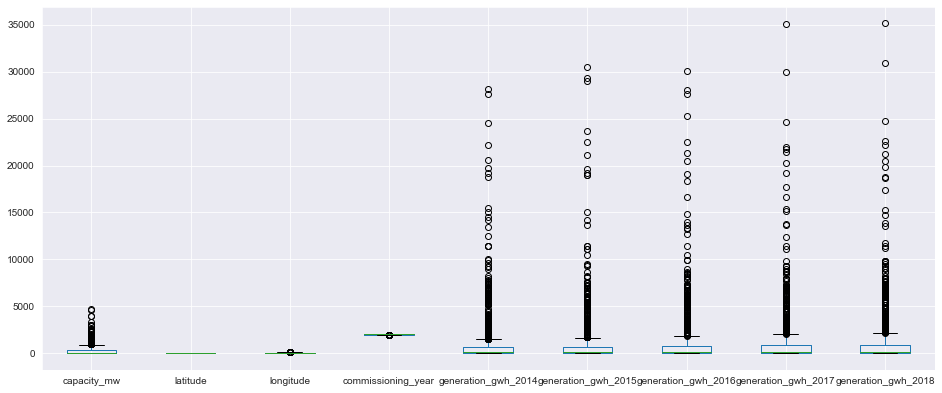

In [182]:
data1[num_cols].iloc[:,:].boxplot(figsize = (16,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

### Converting commisioning year into age and dropping commisioning year..

In [40]:
data2 = pd.get_dummies(data1, drop_first=True)

In [41]:
data2['pp_age'] = 2019 - data2['commissioning_year']
data2.drop('commissioning_year',axis=1,inplace=True)
data2

,capacity_mw,latitude,longitude,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind,pp_age
0,2.5,28.1839,73.2407,0,14.235000,14.2350,14.235000,14.235000,14.235000,0,0,0,0,0,1,0,8.0
1,98.0,24.7663,74.6090,0,558.012000,558.0120,558.012000,558.012000,558.012000,1,0,0,0,0,0,0,13.0
2,39.2,21.9038,69.3732,0,223.204800,223.2048,223.204800,223.204800,223.204800,0,0,0,0,0,0,1,12.0
3,135.0,23.8712,91.3602,0,617.789264,843.7470,886.004428,663.774500,626.239128,0,1,0,0,0,0,0,15.0
4,1800.0,21.9603,82.4091,1,0.000000,5916.3700,6243.000000,5385.579736,7279.000000,1,0,0,0,0,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,0.000000,0.0000,233.596650,865.400000,686.500000,1,0,0,0,0,0,0,3.0
903,3.0,12.8932,78.1654,0,17.082000,17.0820,17.082000,17.082000,17.082000,0,0,0,0,0,1,0,6.0
904,25.5,15.2758,75.5811,0,145.197000,145.1970,145.197000,145.197000,145.197000,0,0,0,0,0,0,1,12.0
905,80.0,24.3500,73.7477,0,455.520000,455.5200,455.520000,455.520000,455.520000,1,0,0,0,0,0,0,13.0


In [42]:
data_c_01['pp_age'] = 2019 - data_c_01['commissioning_year']
data_c_01.drop('commissioning_year',axis=1,inplace=True)
data_c_01

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,pp_age
0,2.5,28.1839,73.2407,Solar,0,14.235000,14.2350,14.235000,14.235000,14.235000,8.0
1,98.0,24.7663,74.6090,Coal,0,558.012000,558.0120,558.012000,558.012000,558.012000,13.0
2,39.2,21.9038,69.3732,Wind,0,223.204800,223.2048,223.204800,223.204800,223.204800,12.0
3,135.0,23.8712,91.3602,Gas,0,617.789264,843.7470,886.004428,663.774500,626.239128,15.0
4,1800.0,21.9603,82.4091,Coal,1,0.000000,5916.3700,6243.000000,5385.579736,7279.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,1,0.000000,0.0000,233.596650,865.400000,686.500000,3.0
903,3.0,12.8932,78.1654,Solar,0,17.082000,17.0820,17.082000,17.082000,17.082000,6.0
904,25.5,15.2758,75.5811,Wind,0,145.197000,145.1970,145.197000,145.197000,145.197000,12.0
905,80.0,24.3500,73.7477,Coal,0,455.520000,455.5200,455.520000,455.520000,455.520000,13.0


<h2><font color = "blue">02. Checking for duplicate entries...</font></h2>

In [43]:
data2.duplicated().sum()

1

In [44]:
data_c_01.duplicated().sum()

1

### Observations:
1. 1 Duplicate entry.

In [45]:
## removing duplicate entries
data2.drop_duplicates(inplace=True)
data_c_01.drop_duplicates(inplace=True)

In [46]:
data2

,capacity_mw,latitude,longitude,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind,pp_age
0,2.5,28.1839,73.2407,0,14.235000,14.2350,14.235000,14.235000,14.235000,0,0,0,0,0,1,0,8.0
1,98.0,24.7663,74.6090,0,558.012000,558.0120,558.012000,558.012000,558.012000,1,0,0,0,0,0,0,13.0
2,39.2,21.9038,69.3732,0,223.204800,223.2048,223.204800,223.204800,223.204800,0,0,0,0,0,0,1,12.0
3,135.0,23.8712,91.3602,0,617.789264,843.7470,886.004428,663.774500,626.239128,0,1,0,0,0,0,0,15.0
4,1800.0,21.9603,82.4091,1,0.000000,5916.3700,6243.000000,5385.579736,7279.000000,1,0,0,0,0,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,0.000000,0.0000,233.596650,865.400000,686.500000,1,0,0,0,0,0,0,3.0
903,3.0,12.8932,78.1654,0,17.082000,17.0820,17.082000,17.082000,17.082000,0,0,0,0,0,1,0,6.0
904,25.5,15.2758,75.5811,0,145.197000,145.1970,145.197000,145.197000,145.197000,0,0,0,0,0,0,1,12.0
905,80.0,24.3500,73.7477,0,455.520000,455.5200,455.520000,455.520000,455.520000,1,0,0,0,0,0,0,13.0


In [48]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data_c_01['primary_fuel'] = le.fit_transform(data_c_01['primary_fuel'])

In [49]:
data_c_01

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,pp_age
0,2.5,28.1839,73.2407,6,0,14.235000,14.2350,14.235000,14.235000,14.235000,8.0
1,98.0,24.7663,74.6090,1,0,558.012000,558.0120,558.012000,558.012000,558.012000,13.0
2,39.2,21.9038,69.3732,7,0,223.204800,223.2048,223.204800,223.204800,223.204800,12.0
3,135.0,23.8712,91.3602,2,0,617.789264,843.7470,886.004428,663.774500,626.239128,15.0
4,1800.0,21.9603,82.4091,1,1,0.000000,5916.3700,6243.000000,5385.579736,7279.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,1,0.000000,0.0000,233.596650,865.400000,686.500000,3.0
903,3.0,12.8932,78.1654,6,0,17.082000,17.0820,17.082000,17.082000,17.082000,6.0
904,25.5,15.2758,75.5811,7,0,145.197000,145.1970,145.197000,145.197000,145.197000,12.0
905,80.0,24.3500,73.7477,1,0,455.520000,455.5200,455.520000,455.520000,455.520000,13.0


In [52]:
data2.reset_index(drop=True, inplace=True)
data_c_01.reset_index(drop=True, inplace=True)

<h2><font color = "blue">08. Checking Skewness & Removing using Power transformation...</font></h2>

In [53]:
data2.columns

Index(['capacity_mw', 'latitude', 'longitude', 'other_fuel1',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'primary_fuel_Coal',
       'primary_fuel_Gas', 'primary_fuel_Hydro', 'primary_fuel_Nuclear',
       'primary_fuel_Oil', 'primary_fuel_Solar', 'primary_fuel_Wind',
       'pp_age'],
      dtype='object')

In [54]:
data2[['capacity_mw', 'latitude', 'longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018','pp_age']].skew()

capacity_mw            3.121674
latitude              -0.139754
longitude              1.149518
generation_gwh_2014    4.969895
generation_gwh_2015    5.236301
generation_gwh_2016    4.958670
generation_gwh_2017    4.961050
generation_gwh_2018    4.830264
pp_age                 1.801875
dtype: float64

In [55]:
data_c_01[['capacity_mw', 'latitude', 'longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018','pp_age']].skew()

capacity_mw            3.121674
latitude              -0.139754
longitude              1.149518
generation_gwh_2014    4.969895
generation_gwh_2015    5.236301
generation_gwh_2016    4.958670
generation_gwh_2017    4.961050
generation_gwh_2018    4.830264
pp_age                 1.801875
dtype: float64

### Observation
1. All the numerical features have skewness. we will remove it using yeo-johnson transformation

In [56]:
x = data2[['capacity_mw', 'latitude', 'longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018','pp_age']]

x_c = data_c_01[['capacity_mw', 'latitude', 'longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018','pp_age']]

In [57]:
from sklearn.preprocessing import PowerTransformer
pt_1 = PowerTransformer(method='yeo-johnson', standardize=True)
pt_2 = PowerTransformer(method='yeo-johnson', standardize=True)
x_pt = pt_1.fit_transform(x)
x_c_pt = pt_2.fit_transform(x_c)

In [58]:
x_pt = pd.DataFrame(x_pt, columns = x.columns)
x_c_pt = pd.DataFrame(x_c_pt, columns = x_c.columns)

In [59]:
num_feat = ['capacity_mw', 'latitude', 'longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018','pp_age']
for col in num_feat:
    data2[col]=x_pt[col]
    data_c_01[col]=x_c_pt[col]

In [60]:
data2[['capacity_mw', 'latitude', 'longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018','pp_age']].skew()

capacity_mw            0.021911
latitude              -0.075420
longitude              0.008280
generation_gwh_2014   -0.014635
generation_gwh_2015   -0.006252
generation_gwh_2016   -0.003463
generation_gwh_2017   -0.001858
generation_gwh_2018   -0.001337
pp_age                 0.002512
dtype: float64

In [61]:
data_c_01[['capacity_mw', 'latitude', 'longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018','pp_age']].skew()

capacity_mw            0.021911
latitude              -0.075420
longitude              0.008280
generation_gwh_2014   -0.014635
generation_gwh_2015   -0.006252
generation_gwh_2016   -0.003463
generation_gwh_2017   -0.001858
generation_gwh_2018   -0.001337
pp_age                 0.002512
dtype: float64

### Observation
1. skewness in all numerical features is removed & are well within skewness of +/-0.5.

<h2><font color = "blue">09. Checking outliers & removing if any..</font></h2>

In [62]:
data3 = data2.copy()
data3_c = data_c_01.copy()

In [63]:
data_out_1 = data2[['capacity_mw', 'latitude', 'longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018','pp_age']]
data_out_2 = data_c_01[['capacity_mw', 'latitude', 'longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018','pp_age']]

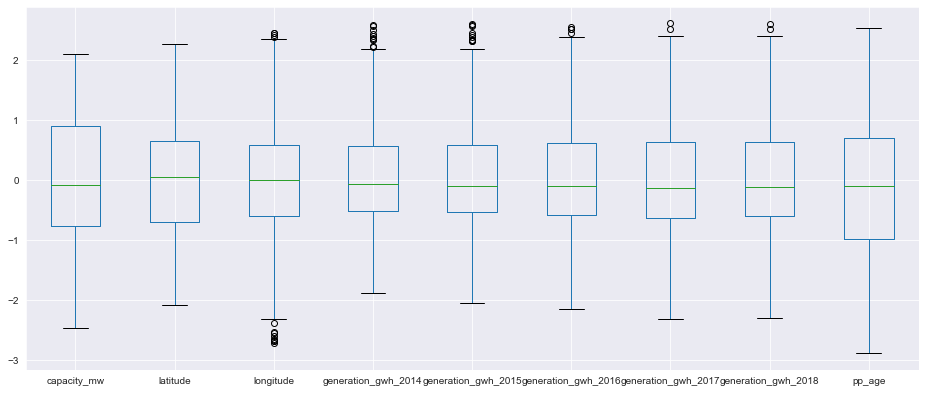

In [64]:
data_out_1.iloc[:,:].boxplot(figsize = (16,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

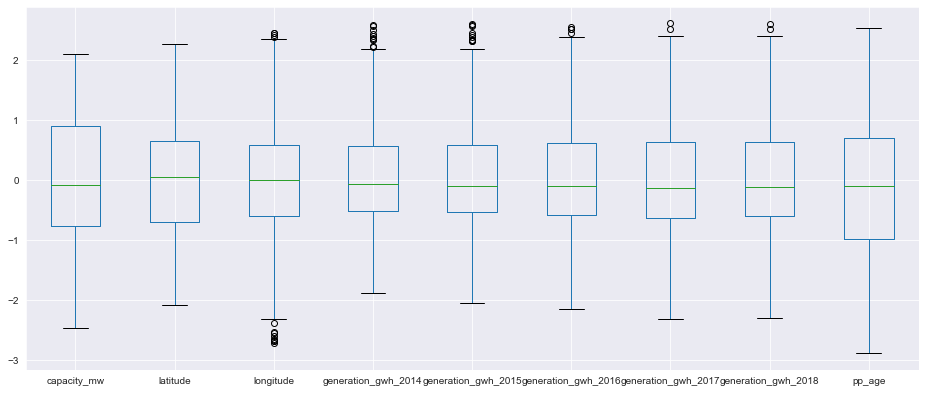

In [65]:
data_out_2.iloc[:,:].boxplot(figsize = (16,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [66]:
# creating a function to remove outliers using standard deviation method...
def get_outliers_std(data):
    
    #empty list to store index values
    all_indices = []
    
    for column in data.columns:
        data_mean, data_std = np.mean(data[column]), np.std(data[column])
        cut_off = data_std * 3
        lower, upper = data_mean - cut_off, data_mean + cut_off

        index = np.where((data[column] < lower) | (data [column] > upper))

        all_indices.extend(index[0])
    
    set_res = set(all_indices)
    indices_to_remove = np.array(list(set_res))
#     print(indices_to_remove)
    return indices_to_remove #returns list of indices to remove outliers

# data.drop(data.index[indices_to_remove])



#  creating a function to remove outliers using inter quantile range...
def get_outliers_iqr(data):
    
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3-q1
    
    #empty list to store index values
    all_indices = []
    
    for column in data.columns:
#         data_mean, data_std = np.mean(data[column]), np.std(data[column])
#         cut_off = data_std * 3
        lower, upper = (q1[column] - (1.5*iqr[column])) , (q3[column] + (1.5*iqr[column]))

        index = np.where((data[column] < lower) | (data [column] > upper))

        all_indices.extend(index[0])
    
    set_res = set(all_indices)
    indices_to_remove = np.array(list(set_res))
#     print(indices_to_remove)
    return indices_to_remove#data.drop(data.index[indices_to_remove]) #returns the data with removed outliers

### Using IQR Method to remove outliers..

In [67]:
to_remove_iqr = get_outliers_iqr(data_out_1)
data_out_1 = data_out_1.drop(data_out_1.index[to_remove_iqr])
data3_iqr = data3.drop(data3.index[to_remove_iqr])

to_remove_iqr = get_outliers_iqr(data_out_2)
data_out_2 = data_out_2.drop(data_out_2.index[to_remove_iqr])
data3_c_iqr = data3_c.drop(data3_c.index[to_remove_iqr])

In [68]:
total_data_loss = (data3.shape[0] - data3_iqr.shape[0])*100/data3.shape[0]
print('Total Data loss after removing Outliers : ', round(total_data_loss,2))

Total Data loss after removing Outliers :  2.54


In [69]:
total_data_loss = (data3_c.shape[0] - data3_c_iqr.shape[0])*100/data3_c.shape[0]
print('Total Data loss after removing Outliers : ', round(total_data_loss,2))

Total Data loss after removing Outliers :  2.54


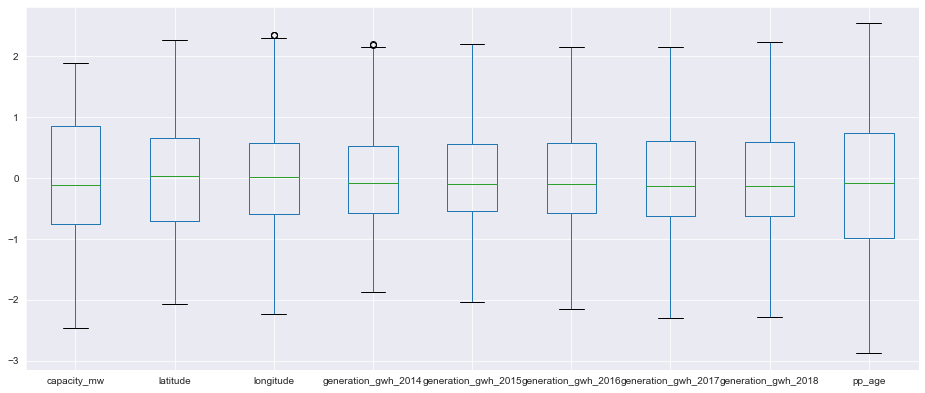

In [71]:
data_out_1.iloc[:,:].boxplot(figsize = (16,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

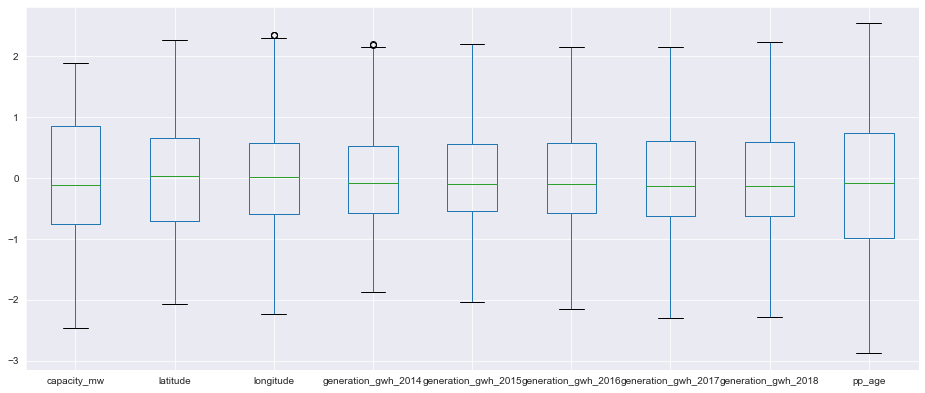

In [72]:
data_out_2.iloc[:,:].boxplot(figsize = (16,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

### Observation
1. using IQR Method, outliers removed from all the columns 
2. Data loss after removing outliers using IQR is : 2.54%

<h2><font color = "blue">10. Feature encoding & Dropping</font></h2>

In [73]:
data5 = data3_iqr.copy()
data5_c = data3_c_iqr.copy()
data5

,capacity_mw,latitude,longitude,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind,pp_age
0,-1.694949,1.157830,-0.938752,0,-0.966201,-1.062503,-1.130835,-1.221234,-1.215978,0,0,0,0,0,1,0,-0.617456
1,0.192527,0.581574,-0.530003,0,0.514364,0.478025,0.448986,0.413801,0.403573,1,0,0,0,0,0,0,0.011358
3,0.359808,0.431911,2.158650,0,0.561464,0.675631,0.672742,0.498629,0.459517,0,1,0,0,0,0,0,0.198316
4,1.649040,0.114288,1.123156,1,-1.872701,1.672595,1.677596,1.571388,1.717433,1,0,0,0,0,0,0,-1.478822
6,-0.066457,-1.730818,0.087216,0,-0.044165,-0.112232,-0.545944,-0.441789,-0.714642,0,0,1,0,0,0,0,1.737280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,1.592980,-0.810474,0.167733,1,-1.872701,-2.034336,0.041863,0.629470,0.504278,1,0,0,0,0,0,0,-1.813428
902,-1.614905,-1.351326,0.346154,0,-0.903516,-0.996182,-1.061959,-1.148773,-1.144414,0,0,0,0,0,1,0,-0.982227
903,-0.523553,-0.973772,-0.265713,0,-0.078567,-0.132749,-0.172569,-0.223005,-0.228351,0,0,0,0,0,0,1,-0.093014
904,0.085776,0.511899,-0.781994,0,0.421408,0.382772,0.352439,0.315400,0.305835,1,0,0,0,0,0,0,0.011358


In [74]:
data5_c

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,pp_age
0,-1.694949,1.157830,-0.938752,6,0,-0.966201,-1.062503,-1.130835,-1.221234,-1.215978,-0.617456
1,0.192527,0.581574,-0.530003,1,0,0.514364,0.478025,0.448986,0.413801,0.403573,0.011358
3,0.359808,0.431911,2.158650,2,0,0.561464,0.675631,0.672742,0.498629,0.459517,0.198316
4,1.649040,0.114288,1.123156,1,1,-1.872701,1.672595,1.677596,1.571388,1.717433,-1.478822
6,-0.066457,-1.730818,0.087216,3,0,-0.044165,-0.112232,-0.545944,-0.441789,-0.714642,1.737280
...,...,...,...,...,...,...,...,...,...,...,...
901,1.592980,-0.810474,0.167733,1,1,-1.872701,-2.034336,0.041863,0.629470,0.504278,-1.813428
902,-1.614905,-1.351326,0.346154,6,0,-0.903516,-0.996182,-1.061959,-1.148773,-1.144414,-0.982227
903,-0.523553,-0.973772,-0.265713,7,0,-0.078567,-0.132749,-0.172569,-0.223005,-0.228351,-0.093014
904,0.085776,0.511899,-0.781994,1,0,0.421408,0.382772,0.352439,0.315400,0.305835,0.011358


In [75]:
x_check = data5[['latitude', 'longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018','pp_age','capacity_mw']]
xc_check = data5_c[['latitude', 'longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018','pp_age','capacity_mw']]

<h2><font color = "blue">11. Checking Correlation & Multicollinearity...</font></h2>

### Correlation..

In [76]:
x_check.corr()

,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,pp_age,capacity_mw
latitude,1.000000,-0.034738,0.043560,0.042463,0.070943,0.090142,0.112426,-0.140827,0.061268
longitude,-0.034738,1.000000,0.076020,0.122003,0.184196,0.248344,0.263886,0.019381,0.347289
generation_gwh_2014,0.043560,0.076020,1.000000,0.839861,0.706974,0.608801,0.582702,0.417541,0.475291
generation_gwh_2015,0.042463,0.122003,0.839861,1.000000,0.878299,0.749144,0.732132,0.272872,0.598828
generation_gwh_2016,0.070943,0.184196,0.706974,0.878299,1.000000,0.877737,0.857249,0.143617,0.673900
generation_gwh_2017,0.090142,0.248344,0.608801,0.749144,0.877737,1.000000,0.918486,0.068461,0.724659
generation_gwh_2018,0.112426,0.263886,0.582702,0.732132,0.857249,0.918486,1.000000,0.022643,0.722709
pp_age,-0.140827,0.019381,0.417541,0.272872,0.143617,0.068461,0.022643,1.000000,0.006818
capacity_mw,0.061268,0.347289,0.475291,0.598828,0.673900,0.724659,0.722709,0.006818,1.000000


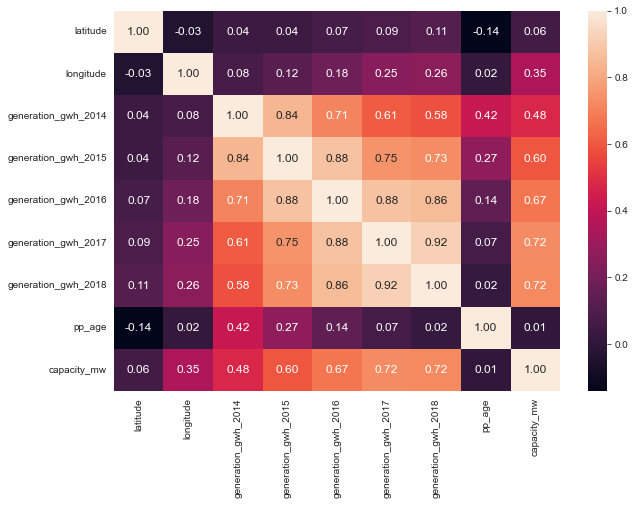

In [77]:
plt.figure(figsize=(10,7))
sns.heatmap(x_check.corr(),annot=True, fmt = ".2f", annot_kws={'size':12});
plt.show()

#### Observation:
1. latitude and pp_age has the least correlation with the target variable.
2. longitude generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018 has hgh correlation with target.
3. generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018 are correlated with each other, this indicates multicollinearity.

In [78]:
#Model statistics
#Must add constant for y-intercept
model = sm.OLS(x_check['capacity_mw'], sm.add_constant(x_check.drop('capacity_mw', axis=1))).fit()
# print(model.params)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            capacity_mw   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     152.3
Date:                Sat, 15 Oct 2022   Prob (F-statistic):          5.81e-160
Time:                        12:24:34   Log-Likelihood:                -857.09
No. Observations:                 883   AIC:                             1732.
Df Residuals:                     874   BIC:                             1775.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0021    

### Multicollinearity check

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
df_feat = x_check.drop('capacity_mw', axis=1)
df_tgt = x_check['capacity_mw']

vif = pd.DataFrame()
vif["variables"] = df_feat.columns
vif["VIF"] = [variance_inflation_factor(df_feat.values, i) for i in range(df_feat.shape[1])]
vif.sort_values(by = 'VIF', ascending = False)

,variables,VIF
4,generation_gwh_2016,8.952691
5,generation_gwh_2017,8.047893
3,generation_gwh_2015,7.632844
6,generation_gwh_2018,7.223940
2,generation_gwh_2014,3.969188
7,pp_age,1.366680
1,longitude,1.102317
0,latitude,1.045107


In [81]:
dfc_feat = xc_check

vif = pd.DataFrame()
vif["variables"] = dfc_feat.columns
vif["VIF"] = [variance_inflation_factor(dfc_feat.values, i) for i in range(dfc_feat.shape[1])]
vif.sort_values(by = 'VIF', ascending = False)

,variables,VIF
4,generation_gwh_2016,8.952807
5,generation_gwh_2017,8.293792
3,generation_gwh_2015,7.681379
6,generation_gwh_2018,7.387158
2,generation_gwh_2014,3.970314
8,capacity_mw,2.395291
7,pp_age,1.380007
1,longitude,1.179626
0,latitude,1.045287


### Observation
1. Multicollinearity is removed.. VIF for all the features is within 10.

<h1 align="center"><font color = "red">Data Cleaning</font> </h1>

<h2><font color = "blue">11. Preparing data for ML model</font></h2>

In [83]:
x = data5.drop(columns = ['capacity_mw'])
y_reg = data5['capacity_mw']

xc = data5_c.drop(columns = ['primary_fuel'])
y_class = data5_c['primary_fuel']

## Check for imbalence data

In [88]:
from collections import Counter

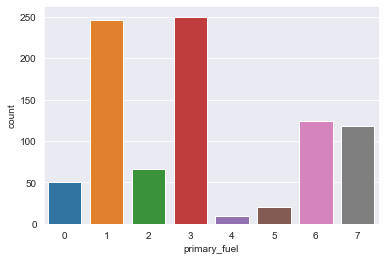

Counter({6: 124, 1: 246, 2: 66, 3: 250, 0: 50, 7: 118, 5: 20, 4: 9})

In [90]:
sns.countplot(x=y_class)
plt.show()
Counter(y_class)

In [91]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
xc, y_class = oversample.fit_resample(xc, y_class)

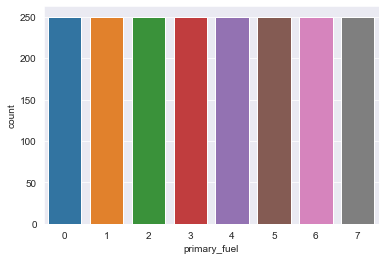

Counter({6: 250, 1: 250, 2: 250, 3: 250, 0: 250, 7: 250, 5: 250, 4: 250})

In [92]:
sns.countplot(x=y_class)
plt.show()
Counter(y_class)

### using Standard Scaler to standardize the data

In [93]:
#Transforming data into Standard Norma Distribution
from sklearn.preprocessing import StandardScaler
sc_1 = StandardScaler()
sc_2 = StandardScaler()

In [95]:
X = pd.DataFrame(sc_1.fit_transform(x), columns=x.columns)
X

,latitude,longitude,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind,pp_age
0,1.156008,-0.997306,-0.500638,-0.956286,-1.056069,-1.125550,-1.217742,-1.212374,-0.621438,-0.284224,-0.628446,-0.101477,-0.152233,2.474059,-0.392745,-0.613610
1,0.585337,-0.568096,-0.500638,0.559351,0.522244,0.490682,0.452700,0.441933,1.609171,-0.284224,-0.628446,-0.101477,-0.152233,-0.404194,-0.392745,0.011040
2,0.437124,2.255137,-0.500638,0.607566,0.724697,0.719595,0.539366,0.499078,-0.621438,3.518350,-0.628446,-0.101477,-0.152233,-0.404194,-0.392745,0.196759
3,0.122579,1.167811,1.826012,-1.884259,1.746113,1.747608,1.635356,1.783989,1.609171,-0.284224,-0.628446,-0.101477,-0.152233,-0.404194,-0.392745,-1.469273
4,-1.704647,0.080018,-0.500638,-0.012408,-0.082491,-0.527178,-0.421417,-0.700279,-0.621438,-0.284224,1.591226,-0.101477,-0.152233,-0.404194,-0.392745,1.725532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,-0.793221,0.164565,1.826012,-1.884259,-2.051739,0.074175,0.673040,0.544799,1.609171,-0.284224,-0.628446,-0.101477,-0.152233,-0.404194,-0.392745,-1.801663
879,-1.328831,0.351917,-0.500638,-0.892117,-0.988121,-1.055086,-1.143712,-1.139274,-0.621438,-0.284224,-0.628446,-0.101477,-0.152233,2.474059,-0.392745,-0.975966
880,-0.954937,-0.290577,-0.500638,-0.047626,-0.103511,-0.145198,-0.197896,-0.203552,-0.621438,-0.284224,-0.628446,-0.101477,-0.152233,-0.404194,2.546184,-0.092641
881,0.516337,-0.832701,-0.500638,0.464193,0.424655,0.391910,0.352169,0.342097,1.609171,-0.284224,-0.628446,-0.101477,-0.152233,-0.404194,-0.392745,0.011040


In [96]:
XC = pd.DataFrame(sc_1.fit_transform(xc), columns=xc.columns)
XC

,capacity_mw,latitude,longitude,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,pp_age
0,-1.783708,1.460565,-0.887161,-0.314420,-0.966630,-1.019706,-0.982039,-1.084618,-0.966239,-0.861571
1,0.197230,0.850244,-0.400966,-0.314420,0.506322,0.474372,0.494716,0.455018,0.479243,-0.115552
2,0.372794,0.691733,2.797105,-0.314420,0.553179,0.666020,0.703873,0.534897,0.529175,0.106253
3,1.725865,0.355334,1.565416,2.419668,-1.868470,1.632924,1.643172,1.545063,1.651890,-1.883489
4,-0.074579,-1.598847,0.333197,-0.314420,-0.049335,-0.098088,-0.435306,-0.350651,-0.518786,1.932066
...,...,...,...,...,...,...,...,...,...,...
1995,0.274614,-0.206662,-0.694435,-0.314420,0.571265,0.539141,0.557911,0.519796,0.540246,-0.239378
1996,-0.634627,-0.468316,-0.560096,-0.314420,-0.142850,-0.177953,-0.145428,-0.206103,-0.142505,-0.239378
1997,-0.802606,0.219475,-0.483652,-0.314420,-0.265042,-0.301809,-0.267773,-0.333546,-0.262174,-0.239378
1998,-0.171884,-0.137323,-0.297042,-0.314420,0.208039,0.175767,0.202527,0.154386,0.196324,-0.239378


<h1 align="center"><font color = "red">Model Selection</font> </h1>

<h1 align="center"><font color = "red">For Classification model</font> </h1>

In [107]:
## TO PLOT CONFUSION MATRIX
def confusion_matrix_c(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print("====================")
    print('Confusion Matrix :\n')
    print(cm)
    print("====================")
    
    
## TO PLOT ROC_AUC CURVE
def plot_roc_auc_curve(fpr, tpr):
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    


# TO print classification report, confusion matrx, roc-auc curve
def print_score(clf,x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print(f"Accuracy score for Train : {accuracy_score(y_train,y_pred) * 100:.2f}%")
        return round(accuracy_score(y_train,y_pred)*100,2)
#         print('\n \n Train Classification report \n', classification_report(y_train,y_pred, digits=2))
              
    elif train==False:
        y_pred = clf.predict(x_test)
        acc = round(accuracy_score(y_test,y_pred)*100,2)
        print(f"Accuracy score for Test : {accuracy_score(y_test,y_pred) * 100:.2f}%")
        confusion_matrix_c(y_test, y_pred)
        print('\n \n Test Classification report \n', classification_report(y_test, y_pred, digits=2))
        
        diff = []
        best_cv = []
        for j in range(3, 12):
            cv_score = round(cross_val_score(clf, XC, y_class, cv=j, scoring="accuracy").mean()*100,2)
            diff.append(abs(cv_score - acc))
            best_cv.append(j)
        k_f = best_cv[diff.index(min(diff))]
        cv_score = cross_val_score(clf,XC, y_class, cv=k_f, scoring="accuracy").mean()
        print(f"Cross Validation score at best cv={k_f} is : {cv_score*100:.2f}%")
#         y_predict_probabilities = clf.predict_proba(x_test)[:,1]
#         fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
#         roc_auc = auc(fpr, tpr)
#         plot_roc_auc_curve(fpr, tpr)
        return acc,k_f, min(diff),cv_score*100

In [108]:
dtc = DecisionTreeClassifier()
etc = ExtraTreesClassifier()
gnb = GaussianNB()
knc = KNeighborsClassifier()
lgr = LogisticRegression(multi_class='ovr')
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
bgc = BaggingClassifier()
svc = SVC()

In [109]:
algo = [] #list to save ML algorithm name
rs = []
cv_fold = []
#lists to store evaluation metrics data for train set
train_accuracy = [] 

#lists to store evaluation metrics data for test set
test_accuracy = []

crossvalscore = []
score_diff = []


models = [dtc,etc,gnb,knc,lgr,rfc,gbc,bgc,svc]
models_name = ['DecisionTreeClassifier','ExtraTreesClassifier', 'GaussianNB','KNeighborsClassifier','LogisticRegression',
               'RandomForestClassifier','GradientBoostingClassifier','BaggingClassifier','SVC']
dummy_count = 0 #dummy variable for count purpose
for model in models:
    diff = []
    randomstate = []
    for i in range(0, 150):  ### loop to find best random state for splitting
        x_train, x_test, y_train, y_test = train_test_split(XC, y_class, test_size = 0.2, random_state = i, stratify=y_class)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        diff.append(abs(accuracy_score(y_train, pred_train) - accuracy_score(y_test, pred_test)))
        randomstate.append(i)
        
    best_i = randomstate[diff.index(min(diff))]
    rs.append(best_i)
    print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
    print(' ')
    print(' ')
    print('for '+ models_name[dummy_count] + ' model..')
    print(' ')
    print("Best Random_state number for splitting the data is: ", best_i)
    print(' ')
    
    ### splitting with best random state
    x_train, x_test, y_train, y_test = train_test_split(XC, y_class, random_state=best_i, test_size=.2, stratify=y_class)
    
    
    ### training the model
    model.fit(x_train, y_train)
    algo.append(models_name[dummy_count])
    tr_ac = print_score(model, x_train, x_test, y_train, y_test, train=True)
    train_accuracy.append(tr_ac)
    test_ac, k_f, sc_diff, cvs = print_score(model, x_train, x_test, y_train, y_test, train=False)
    cv_fold.append(k_f)
    score_diff.append(sc_diff)
    test_accuracy.append(test_ac)
    crossvalscore.append(cvs)
#     print(cv_fold)
#     print(score_diff)
    dummy_count+=1

    
### dataframe to make list of all the ML algorithms & their evaluation metrics
table = pd.DataFrame(list(zip(algo, rs, train_accuracy, test_accuracy, crossvalscore, score_diff, cv_fold)),
                              columns =['algo', 'best random state', 'train_accuracy', 'test_accuracy', 'cross_val_score', 'Score_diff','best cv fold'])


### display dataframe & sort based on TEST MAE score.
table.sort_values(by=['Score_diff', 'test_accuracy', 'cross_val_score' ])

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for DecisionTreeClassifier model..
 
Best Random_state number for splitting the data is:  0
 
Accuracy score for Train : 100.00%
Accuracy score for Test : 95.75%
Confusion Matrix :

[[46  0  0  0  0  0  0  4]
 [ 0 48  2  0  0  0  0  0]
 [ 0  0 47  2  0  0  1  0]
 [ 0  0  3 44  1  1  1  0]
 [ 0  0  0  0 50  0  0  0]
 [ 0  0  0  0  0 50  0  0]
 [ 0  0  1  0  0  0 49  0]
 [ 1  0  0  0  0  0  0 49]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        50
           1       1.00      0.96      0.98        50
           2       0.89      0.94      0.91        50
           3       0.96      0.88      0.92        50
           4       0.98      1.00      0.99        50
           5       0.98      1.00      0.99        50
           6       0.96      0.98      0.97        50
           7       0.92      0.98      0.95        50

    a

Cross Validation score at best cv=11 is : 95.05%
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for BaggingClassifier model..
 
Best Random_state number for splitting the data is:  0
 
Accuracy score for Train : 99.56%
Accuracy score for Test : 97.00%
Confusion Matrix :

[[47  0  0  0  0  0  0  3]
 [ 0 50  0  0  0  0  0  0]
 [ 0  0 49  1  0  0  0  0]
 [ 0  2  4 44  0  0  0  0]
 [ 0  0  0  0 50  0  0  0]
 [ 0  0  0  0  0 50  0  0]
 [ 0  0  0  0  0  0 50  0]
 [ 2  0  0  0  0  0  0 48]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        50
           1       0.96      1.00      0.98        50
           2       0.92      0.98      0.95        50
           3       0.98      0.88      0.93        50
           4       1.00      1.00      1.00        50
           5       1.00      1.00      1.00        50
           6       1.00      1.00      1.00        50
           7     

,algo,best random state,train_accuracy,test_accuracy,cross_val_score,Score_diff,best cv fold
2,GaussianNB,42,67.75,67.75,68.049144,0.30,7
4,LogisticRegression,49,68.75,68.75,67.901988,0.85,11
8,SVC,3,88.69,88.75,87.903150,0.85,9
3,KNeighborsClassifier,131,93.38,93.00,91.550990,1.45,11
1,ExtraTreesClassifier,98,100.00,98.00,95.752928,1.80,9
6,GradientBoostingClassifier,52,99.94,97.25,95.051357,2.25,11
0,DecisionTreeClassifier,0,100.00,95.75,93.400000,2.60,10
7,BaggingClassifier,0,99.56,97.00,94.051899,2.70,9
5,RandomForestClassifier,8,100.00,98.25,95.300000,2.70,10


### Observation:
1. we will select Gradient Boosting Classifier as it has better test accuracy & Cross value score amongst all models.

<h1 align="center"><font color = "red">For regrssion model..</font> </h1>

In [110]:
lr = LinearRegression()
ls = Lasso()
rd = Ridge()
rfr = RandomForestRegressor()
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
dtr = DecisionTreeRegressor()
svr = SVR()
knr = KNeighborsRegressor()
xgb = XGBRegressor()

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
Linear Regression Model
 
for Linear Regression model, Best Random_state number for splitting the data is:  53
 
===scores for training set===
r2 score for training set 0.7985203779339997
MAE for training set:  0.3251898138349167
MSE for training set:  0.18695035200486657
SMSE for training set:  0.4323775572400429
 
===scores for testing set===
r2 score for testing set :  0.7985851109544955
MAE for testing set:  0.35810205055898087
MSE for testing set:  0.2254855885282296
SMSE for testing set:  0.4748532284066621
 
 


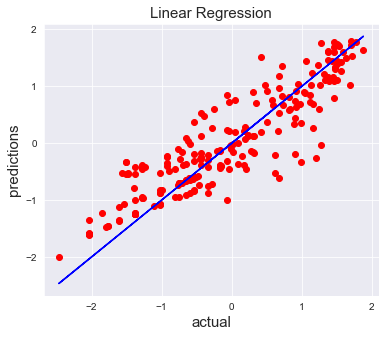

 
Cross Validation score at best cv=4 is : 78.76%
 
 
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
Lasso Model
 
for Lasso model, Best Random_state number for splitting the data is:  5
 
===scores for training set===
r2 score for training set 0.0
MAE for training set:  0.825029472302056
MSE for training set:  0.9545948890258295
SMSE for training set:  0.9770337194927458
 
===scores for testing set===
r2 score for testing set :  -7.851640650979874e-07
MAE for testing set:  0.8717839808961917
MSE for testing set:  1.0428958296985278
SMSE for testing set:  1.02122271307415
 
 


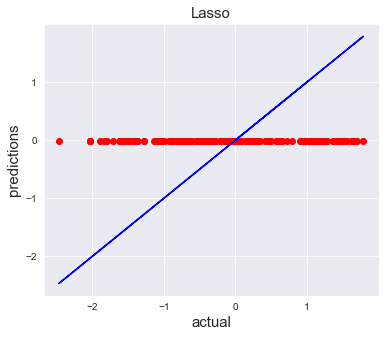

 
Cross Validation score at best cv=4 is : -0.25%
 
 
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
Ridge Model
 
for Ridge model, Best Random_state number for splitting the data is:  86
 
===scores for training set===
r2 score for training set 0.799686604730848
MAE for training set:  0.33964286644445135
MSE for training set:  0.195412108492439
SMSE for training set:  0.4420544180216266
 
===scores for testing set===
r2 score for testing set :  0.7993571326948914
MAE for testing set:  0.331351375216004
MSE for testing set:  0.19660743972345623
SMSE for testing set:  0.4434043749484845
 
 


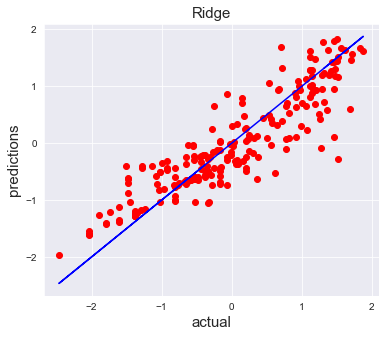

 
Cross Validation score at best cv=4 is : 78.77%
 
 
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
Ada-Boost Regressor Model
 
for Ada-Boost Regressor model, Best Random_state number for splitting the data is:  24
 
===scores for training set===
r2 score for training set 0.8976659480639204
MAE for training set:  0.2632951940437155
MSE for training set:  0.09948585791478698
SMSE for training set:  0.3154137884030864
 
===scores for testing set===
r2 score for testing set :  0.8986153414327187
MAE for testing set:  0.25543844000278015
MSE for testing set:  0.09923821850092271
SMSE for testing set:  0.3150209810487592
 
 


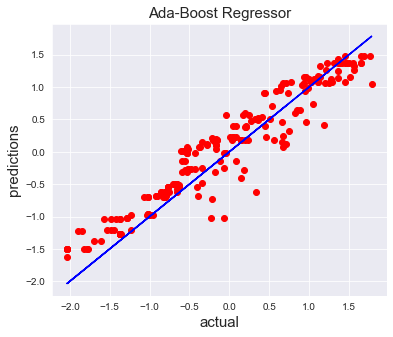

 
Cross Validation score at best cv=5 is : 87.29%
 
 
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
Gradient Boosting Regressor Model
 
for Gradient Boosting Regressor model, Best Random_state number for splitting the data is:  3
 
===scores for training set===
r2 score for training set 0.9805283797063254
MAE for training set:  0.09266508815855574
MSE for training set:  0.018259373800417783
SMSE for training set:  0.13512725039908782
 
===scores for testing set===
r2 score for testing set :  0.9600975333685993
MAE for testing set:  0.13763804706991623
MSE for testing set:  0.043623969001818544
SMSE for testing set:  0.20886351764206823
 
 


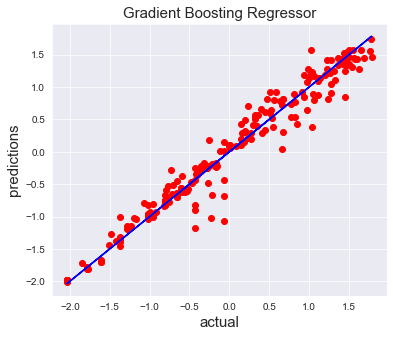

 
Cross Validation score at best cv=11 is : 93.64%
 
 
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
Decision Tree Regressor Model
 
for Decision Tree Regressor model, Best Random_state number for splitting the data is:  35
 
===scores for training set===
r2 score for training set 1.0
MAE for training set:  7.337198992046919e-18
MSE for training set:  1.3254587351402186e-33
SMSE for training set:  3.640685011285951e-17
 
===scores for testing set===
r2 score for testing set :  0.949404777095612
MAE for testing set:  0.11739005614885206
MSE for testing set:  0.048083461877296604
SMSE for testing set:  0.21927941507879076
 
 


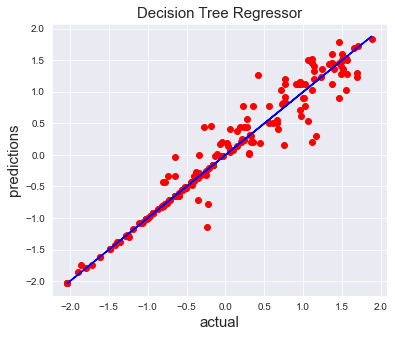

 
Cross Validation score at best cv=8 is : 88.66%
 
 
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
Support Vector Machine Model
 
for Support Vector Machine model, Best Random_state number for splitting the data is:  59
 
===scores for training set===
r2 score for training set 0.9597234044876821
MAE for training set:  0.12711267602516324
MSE for training set:  0.03856240624637375
SMSE for training set:  0.19637313015372992
 
===scores for testing set===
r2 score for testing set :  0.95953889363735
MAE for testing set:  0.13757473842593806
MSE for testing set:  0.04140893638055495
SMSE for testing set:  0.20349185826601257
 
 


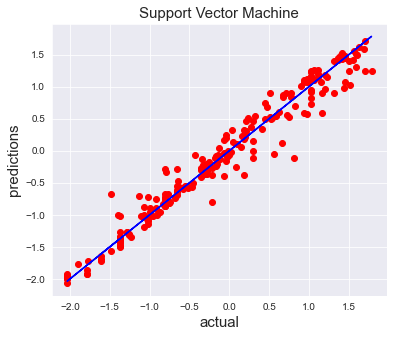

 
Cross Validation score at best cv=8 is : 93.75%
 
 
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
KNeighbors Regressor Model
 
for KNeighbors Regressor model, Best Random_state number for splitting the data is:  87
 
===scores for training set===
r2 score for training set 0.934433718870851
MAE for training set:  0.16772935016387155
MSE for training set:  0.06549678262935325
SMSE for training set:  0.2559233921105166
 
===scores for testing set===
r2 score for testing set :  0.9338329890884667
MAE for testing set:  0.1698855536706196
MSE for testing set:  0.06009485703106942
SMSE for testing set:  0.2451425239142924
 
 


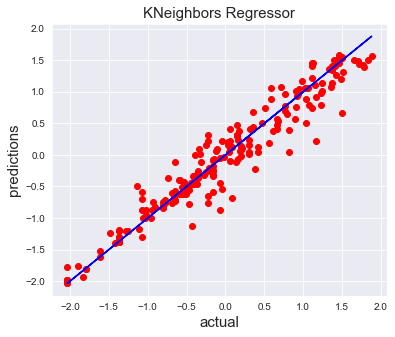

 
Cross Validation score at best cv=10 is : 90.58%
 
 
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
XGB Regressor Model
 
for XGB Regressor model, Best Random_state number for splitting the data is:  32
 
===scores for training set===
r2 score for training set 0.9999904122639137
MAE for training set:  0.0021744893582353025
MSE for training set:  9.205983101580614e-06
SMSE for training set:  0.003034136302406438
 
===scores for testing set===
r2 score for testing set :  0.9661169468034932
MAE for testing set:  0.10281052941497007
MSE for testing set:  0.03467247161530487
SMSE for testing set:  0.18620545538545555
 
 


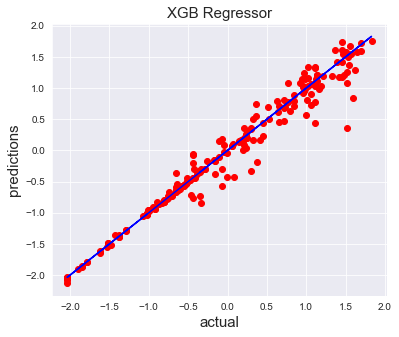

 
Cross Validation score at best cv=5 is : 94.00%
 
 
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
Random Forest Regressor Model
 
for Random Forest Regressor model, Best Random_state number for splitting the data is:  35
 
===scores for training set===
r2 score for training set 0.9909799397036616
MAE for training set:  0.04979318169075373
MSE for training set:  0.00886436069850273
SMSE for training set:  0.09415073392439768
 
===scores for testing set===
r2 score for testing set :  0.9675456052847068
MAE for testing set:  0.09903009622247406
MSE for testing set:  0.030843221186959143
SMSE for testing set:  0.1756223823632943
 
 


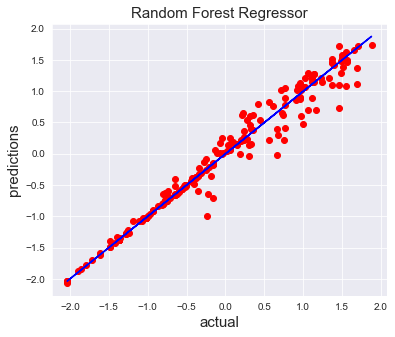

 
Cross Validation score at best cv=8 is : 93.79%
 
 


,algo,best random state,train_r2score,test_r2score,train_mae,train_mse,train_srmse,test_mae,test_mse,test_srmse,best cv fold,cross_val_score
Sr. No.,,,,,,,,,,,,
10,Random Forest Regressor,35,0.99,0.97,0.05,0.01,0.09,0.10,0.03,0.18,8,0.94
9,XGB Regressor,32,1.00,0.97,0.00,0.00,0.00,0.10,0.03,0.19,5,0.94
6,Decision Tree Regressor,35,1.00,0.95,0.00,0.00,0.00,0.12,0.05,0.22,8,0.89
7,Support Vector Machine,59,0.96,0.96,0.13,0.04,0.20,0.14,0.04,0.20,8,0.94
5,Gradient Boosting Regressor,3,0.98,0.96,0.09,0.02,0.14,0.14,0.04,0.21,11,0.94
8,KNeighbors Regressor,87,0.93,0.93,0.17,0.07,0.26,0.17,0.06,0.25,10,0.91
4,Ada-Boost Regressor,24,0.90,0.90,0.26,0.10,0.32,0.26,0.10,0.32,5,0.87
3,Ridge,86,0.80,0.80,0.34,0.20,0.44,0.33,0.20,0.44,4,0.79
1,Linear Regression,53,0.80,0.80,0.33,0.19,0.43,0.36,0.23,0.47,4,0.79


In [111]:
algo = [] #list to save ML algorithm name
rs = []
cv_fold = []
#lists to store evaluation metrics data for train set
train_r2score = [] 
train_mae = []
train_mse = []
train_srmse = []


#lists to store evaluation metrics data for test set
test_r2score = []
test_mae = []
test_mse = []
test_srmse = []

crossvalscore = []
score_diff = []


models = [lr, ls, rd, abr, gbr, dtr,svr, knr, xgb, rfr]
models_name = ['Linear Regression', 'Lasso', 'Ridge',
               'Ada-Boost Regressor', 'Gradient Boosting Regressor',
               'Decision Tree Regressor','Support Vector Machine', 'KNeighbors Regressor', 'XGB Regressor', 'Random Forest Regressor']
dummy_count = 0 #dummy variable for count purpose
for model in models:
    diff = []
    randomstate = []
    for i in range(0, 100):  ### loop to find best random state for splitting
        x_train, x_test, y_train, y_test = train_test_split(X, y_reg, test_size = 0.25, random_state = i)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        diff.append(abs(r2_score(y_train, pred_train) - r2_score(y_test, pred_test)))
        randomstate.append(i)
        
    best_i = randomstate[diff.index(min(diff))]
    rs.append(best_i)
    
    ### splitting the train7 set with best random state
    x_train, x_test, y_train, y_test = train_test_split(X, y_reg, random_state=best_i, test_size=.25)
    
    
    ### straining the model
    model.fit(x_train, y_train)
    algo.append(models_name[dummy_count])
    pred_test = model.predict(x_test)
    pred_train = model.predict(x_train)
    
     ### storing metrics into respective lists
    train_r2score.append(round(r2_score(y_train, pred_train),2))
    train_mae.append(round(mean_absolute_error(y_train, pred_train),2))
    train_mse.append(round(mean_squared_error(y_train, pred_train),2))
    train_srmse.append(round(np.sqrt(mean_squared_error(y_train, pred_train)),2))
    
    
    test_r2score.append(round(r2_score(y_test, pred_test),2))
    test_mae.append(round(mean_absolute_error(y_test, pred_test),2))
    test_mse.append(round(mean_squared_error(y_test, pred_test),2))
    test_srmse.append(round(float(np.sqrt(mean_squared_error(y_test, pred_test))),2))
    
    
    ##showing the results in output
    print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
    print(' ')
    print(' ')
    print(models_name[dummy_count] + ' Model')
    print(' ')
    print('for '+ models_name[dummy_count] + ' model, Best Random_state number for splitting the data is: ', best_i)
    print(' ')
    print('===scores for training set===')
    print('r2 score for training set', r2_score(y_train, pred_train))
    print('MAE for training set: ', mean_absolute_error(y_train, pred_train))
    print('MSE for training set: ', mean_squared_error(y_train, pred_train))
    print('SMSE for training set: ', np.sqrt(mean_squared_error(y_train, pred_train)))
    print(' ')
    print('===scores for testing set===')
    print('r2 score for testing set : ', r2_score(y_test, pred_test))
    print('MAE for testing set: ', mean_absolute_error(y_test, pred_test))
    print('MSE for testing set: ', mean_squared_error(y_test, pred_test))
    print('SMSE for testing set: ', np.sqrt(mean_squared_error(y_test, pred_test)))
    print(' ')
    print(' ')
    
    ##plotting the graph with bestfit line, actual & predicted values
    plt.figure(figsize = (6,5))
    plt.scatter(x = y_test, y=pred_test, color = 'r')
    plt.plot(y_test, y_test, color = 'b')
    plt.xlabel('actual', fontsize = 15)
    plt.ylabel('predictions', fontsize = 15)
    plt.title(models_name[dummy_count], fontsize = 15)
    plt.show()
    
    print(' ')
    
    test_accuracy = r2_score(y_test, pred_test)
    cv_diff = []
    best_cv = []
    
    ### loop to find best CV fold value
    for j in range(4,13):
        cv_score = cross_val_score(model, X, y_reg, cv = j)
        cv_mean = cv_score.mean()
        cv_diff.append(abs(cv_mean - test_accuracy))
        best_cv.append(j)
    
    
    ### printing CV Score based on best CV fold value
    k_f = best_cv[cv_diff.index(min(cv_diff))]
    cv_fold.append(k_f)
    cv_score = cross_val_score(model, X, y_reg, cv=k_f).mean()
    crossvalscore.append(round(cv_score,2))
    score_diff.append(abs(round(cv_score - test_accuracy,2)))
    print(f"Cross Validation score at best cv={k_f} is : {cv_score*100:.2f}%")          
    dummy_count+=1
    print(' ')
    print(' ')
#     print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
    

### dataframe to make list of all the ML algorithms & their evaluation metrics
table = pd.DataFrame(list(zip(algo, rs, train_r2score, test_r2score, train_mae, train_mse,
                              train_srmse, test_mae, test_mse, test_srmse, cv_fold, crossvalscore)),
                              columns =['algo', 'best random state', 'train_r2score', 'test_r2score', 'train_mae','train_mse',
                                       'train_srmse', 'test_mae', 'test_mse', 'test_srmse', 'best cv fold', 'cross_val_score'],
                              index=pd.RangeIndex(start=1, stop=(len(algo)+1), name='Sr. No.'))


### display dataframe & sort based on TEST MAE score.
table.sort_values(by=['test_mae', 'test_r2score', 'cross_val_score', 'test_srmse', 'test_mse' ])

### Observation:
1. we will select Random Forest Regressor as it has higher score for test & Cross validation, minimum difference between test score & cross val score & it has lower test MAE value.

<h1 align="center"><font color = "red">Hyper parameter tuning using GridSearchCV</font> </h1>

## For Classification model

In [117]:
param_grid_gbc = {'n_estimators':[100,200,300,350,400],
                  'max_depth':[2, 3, 4, 5],
                  'min_samples_split':[2, 3, 5],
                  "learning_rate":[0.01,0.05,0.02,0.1,0.2]
                 }

In [119]:
x_train, x_test, y_train, y_test = train_test_split(XC, y_class, test_size = 0.2, random_state = 52, stratify=y_class)

In [120]:
gb_grid = GridSearchCV(estimator = gbc,
                       param_grid = param_grid_gbc,
                       verbose = 2,
                       scoring = 'accuracy')

In [121]:
gb_grid.fit(x_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV] END learning_rate=0.01, max_depth=2, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=2, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=2, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=2, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=2, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=2, min_samples_split=2, n_estimators=200; total time=   3.0s
[CV] END learning_rate=0.01, max_depth=2, min_samples_split=2, n_estimators=200; total time=   3.1s
[CV] END learning_rate=0.01, max_depth=2, min_samples_split=2, n_estimators=200; total time=   3.2s
[CV] END learning_rate=0.01, max_depth=2, min_samples_split=2, n_estimators=200; total time=   3.0s
[CV] END learning_rate=0.01, max_dep

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200; total time=   4.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200; total time=   4.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200; total time=   4.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=300; total time=   6.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=300; total time=   6.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=300; total time=   6.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=300; total time=   6.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=300; total time=   6.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=350; total time=   7.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=350; total time=   7.6s


[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=300; total time=   8.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=350; total time=   9.7s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=350; total time=   9.8s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=350; total time=   9.7s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=350; total time=   9.8s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=350; total time=   9.7s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=400; total time=  11.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=400; total time=  11.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=400; total time=  11.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=400; total time=  11.3s


[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=400; total time=  15.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=400; total time=  15.7s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=400; total time=  15.6s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=400; total time=  14.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=3, n_estimators=100; total time=   3.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=3, n_estimators=100; total time=   3.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=3, n_estimators=100; total time=   3.8s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=3, n_estimators=100; total time=   3.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=3, n_estimators=100; total time=   3.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=3, n_estimators=200; total time=   7.1s


[CV] END learning_rate=0.05, max_depth=2, min_samples_split=3, n_estimators=100; total time=   1.5s
[CV] END learning_rate=0.05, max_depth=2, min_samples_split=3, n_estimators=100; total time=   1.5s
[CV] END learning_rate=0.05, max_depth=2, min_samples_split=3, n_estimators=200; total time=   3.1s
[CV] END learning_rate=0.05, max_depth=2, min_samples_split=3, n_estimators=200; total time=   3.3s
[CV] END learning_rate=0.05, max_depth=2, min_samples_split=3, n_estimators=200; total time=   3.1s
[CV] END learning_rate=0.05, max_depth=2, min_samples_split=3, n_estimators=200; total time=   3.1s
[CV] END learning_rate=0.05, max_depth=2, min_samples_split=3, n_estimators=200; total time=   3.1s
[CV] END learning_rate=0.05, max_depth=2, min_samples_split=3, n_estimators=300; total time=   4.8s
[CV] END learning_rate=0.05, max_depth=2, min_samples_split=3, n_estimators=300; total time=   4.9s
[CV] END learning_rate=0.05, max_depth=2, min_samples_split=3, n_estimators=300; total time=   4.6s


[CV] END learning_rate=0.05, max_depth=3, min_samples_split=3, n_estimators=300; total time=   6.8s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=3, n_estimators=300; total time=   7.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=3, n_estimators=300; total time=   6.9s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=3, n_estimators=300; total time=   6.6s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=3, n_estimators=300; total time=   6.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=3, n_estimators=350; total time=   7.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=3, n_estimators=350; total time=   7.6s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=3, n_estimators=350; total time=   7.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=3, n_estimators=350; total time=   7.6s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=3, n_estimators=350; total time=   7.7s


[CV] END learning_rate=0.05, max_depth=4, min_samples_split=3, n_estimators=350; total time=   9.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=3, n_estimators=350; total time=   9.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=3, n_estimators=350; total time=   9.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=3, n_estimators=400; total time=  11.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=3, n_estimators=400; total time=  11.9s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=3, n_estimators=400; total time=  11.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=3, n_estimators=400; total time=  11.6s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=3, n_estimators=400; total time=  12.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100; total time=   3.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100; total time=   3.1s


[CV] END learning_rate=0.05, max_depth=5, min_samples_split=3, n_estimators=400; total time=  13.9s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100; total time=   3.5s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100; total time=   3.5s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100; total time=   3.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100; total time=   3.7s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100; total time=   3.5s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=200; total time=   7.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=200; total time=   7.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=200; total time=   7.5s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=200; total time=   7.6s


[CV] END learning_rate=0.02, max_depth=2, min_samples_split=5, n_estimators=200; total time=   3.4s
[CV] END learning_rate=0.02, max_depth=2, min_samples_split=5, n_estimators=200; total time=   3.3s
[CV] END learning_rate=0.02, max_depth=2, min_samples_split=5, n_estimators=200; total time=   3.4s
[CV] END learning_rate=0.02, max_depth=2, min_samples_split=5, n_estimators=200; total time=   3.4s
[CV] END learning_rate=0.02, max_depth=2, min_samples_split=5, n_estimators=300; total time=   5.3s
[CV] END learning_rate=0.02, max_depth=2, min_samples_split=5, n_estimators=300; total time=   5.1s
[CV] END learning_rate=0.02, max_depth=2, min_samples_split=5, n_estimators=300; total time=   5.2s
[CV] END learning_rate=0.02, max_depth=2, min_samples_split=5, n_estimators=300; total time=   5.4s
[CV] END learning_rate=0.02, max_depth=2, min_samples_split=5, n_estimators=300; total time=   5.2s
[CV] END learning_rate=0.02, max_depth=2, min_samples_split=5, n_estimators=350; total time=   6.1s


[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=300; total time=   7.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=300; total time=   7.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=350; total time=   7.9s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=350; total time=   8.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=350; total time=   7.7s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=350; total time=   8.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=350; total time=   8.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=400; total time=   9.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=400; total time=   9.6s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=400; total time=  10.1s


[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=400; total time=  11.9s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=400; total time=  12.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=400; total time=  11.5s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=400; total time=  11.7s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=400; total time=  11.9s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100; total time=   3.7s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100; total time=   3.8s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100; total time=   3.8s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100; total time=   3.7s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100; total time=   3.5s


[CV] END learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=200; total time=   3.3s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=200; total time=   3.4s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=200; total time=   3.4s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=200; total time=   3.5s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=200; total time=   3.5s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=300; total time=   5.2s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=300; total time=   5.3s
[CV] END l

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=300; total time=   6.8s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=300; total time=   7.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=300; total time=   6.7s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=300; total time=   6.7s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=300; total time=   6.6s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=350; total time=   8.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=350; total time=   8.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=350; total time=   8.4s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=350; total time=   8.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=350; total time=   8.6s
[CV] END l

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=350; total time=   8.8s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=350; total time=   8.8s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=400; total time=  10.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=400; total time=  10.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=400; total time=   9.7s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=400; total time=   9.6s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=400; total time=   9.7s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=3, n_estimators=100; total time=   2.7s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=3, n_estimators=100; total time=   2.7s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=3, n_estimators=100; total time=   2.6s
[CV] END l

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=3, n_estimators=100; total time=   3.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=3, n_estimators=100; total time=   3.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=3, n_estimators=100; total time=   3.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=3, n_estimators=100; total time=   3.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=3, n_estimators=200; total time=   6.6s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=3, n_estimators=200; total time=   6.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=3, n_estimators=200; total time=   6.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=3, n_estimators=200; total time=   6.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=3, n_estimators=200; total time=   6.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=3, n_estimators=300; total time=   8.5s
[CV] END l

[CV] END learning_rate=0.2, max_depth=2, min_samples_split=3, n_estimators=200; total time=   3.1s
[CV] END learning_rate=0.2, max_depth=2, min_samples_split=3, n_estimators=300; total time=   4.7s
[CV] END learning_rate=0.2, max_depth=2, min_samples_split=3, n_estimators=300; total time=   4.8s
[CV] END learning_rate=0.2, max_depth=2, min_samples_split=3, n_estimators=300; total time=   5.0s
[CV] END learning_rate=0.2, max_depth=2, min_samples_split=3, n_estimators=300; total time=   5.0s
[CV] END learning_rate=0.2, max_depth=2, min_samples_split=3, n_estimators=300; total time=   4.8s
[CV] END learning_rate=0.2, max_depth=2, min_samples_split=3, n_estimators=350; total time=   5.6s
[CV] END learning_rate=0.2, max_depth=2, min_samples_split=3, n_estimators=350; total time=   5.5s
[CV] END learning_rate=0.2, max_depth=2, min_samples_split=3, n_estimators=350; total time=   5.6s
[CV] END learning_rate=0.2, max_depth=2, min_samples_split=3, n_estimators=350; total time=   5.5s
[CV] END l

[CV] END learning_rate=0.2, max_depth=3, min_samples_split=3, n_estimators=350; total time=   7.0s
[CV] END learning_rate=0.2, max_depth=3, min_samples_split=3, n_estimators=350; total time=   6.8s
[CV] END learning_rate=0.2, max_depth=3, min_samples_split=3, n_estimators=350; total time=   6.9s
[CV] END learning_rate=0.2, max_depth=3, min_samples_split=3, n_estimators=400; total time=   7.4s
[CV] END learning_rate=0.2, max_depth=3, min_samples_split=3, n_estimators=400; total time=   7.5s
[CV] END learning_rate=0.2, max_depth=3, min_samples_split=3, n_estimators=400; total time=   7.6s
[CV] END learning_rate=0.2, max_depth=3, min_samples_split=3, n_estimators=400; total time=   7.5s
[CV] END learning_rate=0.2, max_depth=3, min_samples_split=3, n_estimators=400; total time=   7.5s
[CV] END learning_rate=0.2, max_depth=3, min_samples_split=5, n_estimators=100; total time=   2.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END l

[CV] END learning_rate=0.2, max_depth=4, min_samples_split=5, n_estimators=100; total time=   3.2s
[CV] END learning_rate=0.2, max_depth=4, min_samples_split=5, n_estimators=100; total time=   3.1s
[CV] END learning_rate=0.2, max_depth=4, min_samples_split=5, n_estimators=100; total time=   3.0s
[CV] END learning_rate=0.2, max_depth=4, min_samples_split=5, n_estimators=100; total time=   3.1s
[CV] END learning_rate=0.2, max_depth=4, min_samples_split=5, n_estimators=100; total time=   3.2s
[CV] END learning_rate=0.2, max_depth=4, min_samples_split=5, n_estimators=200; total time=   5.7s
[CV] END learning_rate=0.2, max_depth=4, min_samples_split=5, n_estimators=200; total time=   6.1s
[CV] END learning_rate=0.2, max_depth=4, min_samples_split=5, n_estimators=200; total time=   5.6s
[CV] END learning_rate=0.2, max_depth=4, min_samples_split=5, n_estimators=200; total time=   6.0s
[CV] END learning_rate=0.2, max_depth=4, min_samples_split=5, n_estimators=200; total time=   6.0s
[CV] END l

[CV] END learning_rate=0.2, max_depth=5, min_samples_split=5, n_estimators=200; total time=   4.6s
[CV] END learning_rate=0.2, max_depth=5, min_samples_split=5, n_estimators=200; total time=   4.7s
[CV] END learning_rate=0.2, max_depth=5, min_samples_split=5, n_estimators=300; total time=   5.2s
[CV] END learning_rate=0.2, max_depth=5, min_samples_split=5, n_estimators=300; total time=   5.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_split=5, n_estimators=300; total time=   5.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_split=5, n_estimators=300; total time=   5.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_split=5, n_estimators=300; total time=   5.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_split=5, n_estimators=350; total time=   5.4s
[CV] END learning_rate=0.2, max_depth=5, min_samples_split=5, n_estimators=350; total time=   5.3s
[CV] END learning_rate=0.2, max_depth=5, min_samples_split=5, n_estimators=350; total time=   5.3s
[CV] END l

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.02, 0.1, 0.2],
                         'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 200, 300, 350, 400]},
             scoring='accuracy', verbose=2)

In [122]:
gb_grid.best_params_

{'learning_rate': 0.2,
 'max_depth': 5,
 'min_samples_split': 2,
 'n_estimators': 200}

In [123]:
gb_grid.best_score_

0.9481249999999999

## For regression model

In [128]:
param_grid_rfr = {'n_estimators': [100,200, 300, 400, 500],
                  'max_depth':[2,3,4,5],
                  'min_samples_split' : [2, 3, 4, 5]
                 }

In [130]:
x_train, x_test, y_train, y_test = train_test_split(X, y_reg, random_state=35, test_size=.25)

In [131]:
rfr_grid = GridSearchCV(estimator = rfr,
                       param_grid = param_grid_rfr,
                       verbose = 2,
                       scoring = 'r2')

In [132]:
rfr_grid.fit(x_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END .max_depth=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END .max_depth=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END .max_depth=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END .max_depth=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END .max_depth=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END .max_depth=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END .max_depth=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END .max_depth=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END .max_depth=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END .max_depth=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END .max_depth=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END .max_depth=2, min_samples_split=2, n_e

[CV] END .max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END .max_depth=3, min_s

[CV] END .max_depth=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END .max_depth=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END .max_depth=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END .max_depth=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END .max_depth=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END .max_depth=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END .max_depth=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END .max_depth=4, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END .max_depth=4, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END .max_depth=4, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END .max_depth=4, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END .max_depth=4, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END .max_depth=4, min_s

[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=400; total time=   0.6s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END .max_depth=5, min_s

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='r2', verbose=2)

In [133]:
rfr_grid.best_params_

{'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 100}

In [134]:
rfr_grid.best_score_

0.9112464846902742

## Using hyper parameters obtained from gridsearch for classificaion model...

In [135]:
x_train, x_test_class, y_train, y_test_class = train_test_split(XC, y_class, test_size = 0.2, random_state = 52, stratify=y_class)

In [137]:
gbc_tune_final = GradientBoostingClassifier(learning_rate= 0.2, max_depth= 5, min_samples_split= 2, n_estimators= 200)

In [138]:
gbc_tune_final.fit(x_train,y_train)
y_pred=gbc_tune_final.predict(x_test_class)
print('Accuracy Score: ', accuracy_score(y_test_class, y_pred))

Accuracy Score:  0.97


In [142]:
confusion_matrix_c(y_test_class, y_pred)
print('\n \n Test Classification report \n', classification_report(y_test_class, y_pred, digits=2))

cv_score = cross_val_score(gbc_tune_final,XC, y_class, cv=11, scoring="accuracy").mean()
print(f"Cross Validation score at best cv = 11 is : {cv_score*100:.2f}%")
# y_predict_probabilities = gbc_tune_final.predict_proba(x_test_class)[:,1]
# fpr, tpr, _ = roc_curve(y_test_class, y_predict_probabilities)
# roc_auc = auc(fpr, tpr)
# plot_roc_auc_curve(fpr, tpr)

Confusion Matrix :

[[48  0  0  0  0  0  0  2]
 [ 0 50  0  0  0  0  0  0]
 [ 0  1 47  2  0  0  0  0]
 [ 0  1  2 47  0  0  0  0]
 [ 0  0  1  0 49  0  0  0]
 [ 0  0  0  0  0 50  0  0]
 [ 0  0  0  0  0  0 50  0]
 [ 2  0  1  0  0  0  0 47]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        50
           1       0.96      1.00      0.98        50
           2       0.92      0.94      0.93        50
           3       0.96      0.94      0.95        50
           4       1.00      0.98      0.99        50
           5       1.00      1.00      1.00        50
           6       1.00      1.00      1.00        50
           7       0.96      0.94      0.95        50

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

Cross Validation score at best cv = 11 is : 95.45%


### observation:
After tuning we see increase in test accuracy & cross value scores. Hence our model is good.

## Using hyper parameters obtained from gridsearch for regression model...

In [143]:
x_train, x_test_reg, y_train, y_test_reg = train_test_split(X, y_reg, random_state=35, test_size=.25)

In [144]:
rfr_tune_final = RandomForestRegressor(max_depth=5, min_samples_split= 3, n_estimators=100)

In [145]:
rfr_tune_final.fit(x_train,y_train)
y_pred=rfr_tune_final.predict(x_test_reg)

In [146]:
print('r2 score for testing set : ', r2_score(y_test_reg, y_pred))
print('MAE for testing set: ', mean_absolute_error(y_test_reg, y_pred))
print('MSE for testing set: ', mean_squared_error(y_test_reg, y_pred))
print('SMSE for testing set: ', np.sqrt(mean_squared_error(y_test_reg, y_pred)))

r2 score for testing set :  0.951111335661164
MAE for testing set:  0.1522042949691817
MSE for testing set:  0.04646162410254944
SMSE for testing set:  0.215549586180418


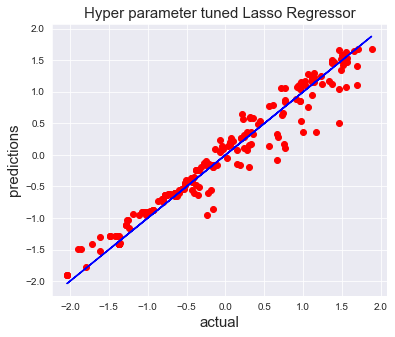

In [147]:
##plotting the graph with bestfit line, actual & predicted values
plt.figure(figsize = (6,5))
plt.scatter(x =y_test_reg, y=y_pred, color = 'r')
plt.plot(y_test_reg, y_test_reg, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('Hyper parameter tuned Lasso Regressor', fontsize = 15)
plt.show()

In [148]:
cross_val_score(rfr_tune_final, X, y_reg, cv = 8, scoring ='r2').mean()

0.9210689699289858

### observation:
After tuning we see increase in test score & cross value scores. Hence our model is good.

<h1 align="center"><font color = "red">Model Saving</font> </h1>

## Saving & predicting classification model

In [149]:
filename='pp_fuel_class.pkl'
pickle.dump(gbc_tune_final,open(filename,'wb'))

filename='pp_capacity_reg.pkl'
pickle.dump(rfr_tune_final,open(filename,'wb'))

In [151]:
model =pickle.load(open('pp_fuel_class.pkl','rb'))
pred =model.predict(x_test_class)
result = pd.DataFrame(list(zip(y_test_class, pred)), columns = ['Actual', 'Predicted'])
result

,Actual,Predicted
0,7,7
1,7,7
2,3,3
3,1,1
4,5,5
...,...,...
395,5,5
396,5,5
397,7,7
398,6,6


## Saving & predicting regression model

In [161]:
pt3 = PowerTransformer(method='yeo-johnson', standardize=True)
temp = pt3.fit_transform(data2[['capacity_mw']])

In [158]:
model =pickle.load(open('pp_capacity_reg.pkl','rb'))
pred =model.predict(x_test_reg)
result = pd.DataFrame(list(zip(y_test_reg, pred)), columns = ['Actual', 'Predicted'])
result

,Actual,Predicted
0,-1.425624,-1.281507
1,-0.043948,0.092074
2,0.051713,0.174061
3,-0.036378,0.087828
4,0.359808,0.328349
...,...,...
216,-0.410329,-0.347257
217,-1.374300,-1.414588
218,1.026179,1.164787
219,1.455027,1.041953
